<a href="https://colab.research.google.com/github/sabaagizew/PythonPackageStructure/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline

In [2]:
df=pd.read_csv('drive/MyDrive/Week1_challenge_data_source(CSV).csv')
df.head()

Bearer Id            Start  ...  Total UL (Bytes) Total DL (Bytes)
0  1.311448e+19   4/4/2019 12:01  ...        36749741.0      308879636.0
1  1.311448e+19   4/9/2019 13:04  ...        53800391.0      653384965.0
2  1.311448e+19   4/9/2019 17:42  ...        27883638.0      279807335.0
3  1.311448e+19   4/10/2019 0:31  ...        43324218.0      846028530.0
4  1.311448e+19  4/12/2019 20:10  ...        38542814.0      569138589.0

[5 rows x 55 columns]

In [3]:
df.shape

(150001, 55)

In [4]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [5]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [6]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Week1 challenge data source(CSV).csv dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Week1 challenge data source(CSV).csv dataset contains 12.5 % missing values.


In [7]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [8]:
# drop columns with more than 30% missing values
df_clean = df.drop(['Dur. (ms)', 'MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)', 'Nb of sec with Vol UL < 1250B'], axis=1)
df_clean.shape

(150001, 51)

In [9]:
# fill missing with ffill method for columns (HTTP UL (Bytes), Activity Duration DL (ms),Dur. (ms).1 )

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'HTTP UL (Bytes)')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')

# fill 'IMSI' column with mode 
df_clean['IMSI'] = df_clean['IMSI'].fillna(df_clean['IMSI'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


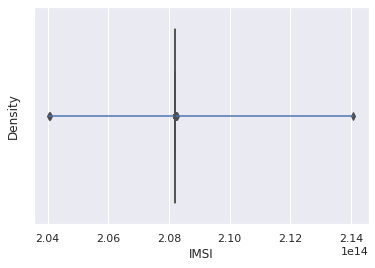

In [31]:
# Checking for skewness on one of the column specifically on the "IMSI"
import seaborn as sns
#
# Box plot
#
sns.boxplot(df.IMSI)
#
# Distribution plot
#
sns.distplot(df.IMSI)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


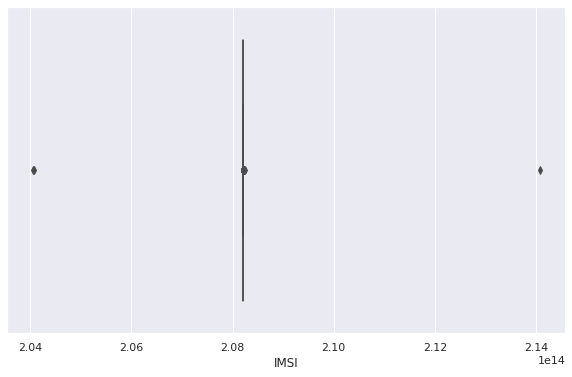

In [32]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.IMSI)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


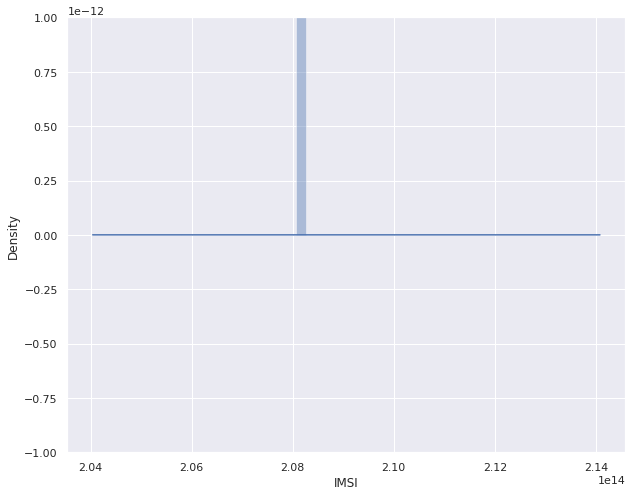

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df.IMSI)

In [34]:
df.IMSI.mode()

0   208,201,402,778,052.00
dtype: float64

In [35]:
# To see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing', inplace=True)

    print(missing_value_df)


every_column_percent_missing(df)

                                                                       column_name  percent_missing
Youtube DL (Bytes)                                              Youtube DL (Bytes)             0.00
Other UL (Bytes)                                                  Other UL (Bytes)             0.00
Other DL (Bytes)                                                  Other DL (Bytes)             0.00
Gaming UL (Bytes)                                                Gaming UL (Bytes)             0.00
Gaming DL (Bytes)                                                Gaming DL (Bytes)             0.00
Netflix UL (Bytes)                                              Netflix UL (Bytes)             0.00
Netflix DL (Bytes)                                              Netflix DL (Bytes)             0.00
Youtube UL (Bytes)                                              Youtube UL (Bytes)             0.00
Email UL (Bytes)                                                  Email UL (Bytes)             0.00


In [36]:
# drop columns with more than 50% missing values
df_clean = df.drop(['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 37500B < Vol UL'], axis=1)

df_clean.shape

(150001, 45)

In [37]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [38]:
df_clean.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [41]:
# how many missing values exist on the new cleaned dataset on percentage ?

percent_missing(df_clean)

The Week1 challenge data source(CSV).csv dataset contains 1.02 % missing values.


In [40]:
every_column_percent_missing(df_clean)

                                                   column_name  percent_missing
Youtube DL (Bytes)                          Youtube DL (Bytes)             0.00
Other UL (Bytes)                              Other UL (Bytes)             0.00
Other DL (Bytes)                              Other DL (Bytes)             0.00
Gaming UL (Bytes)                            Gaming UL (Bytes)             0.00
Gaming DL (Bytes)                            Gaming DL (Bytes)             0.00
Netflix UL (Bytes)                          Netflix UL (Bytes)             0.00
Netflix DL (Bytes)                          Netflix DL (Bytes)             0.00
Youtube UL (Bytes)                          Youtube UL (Bytes)             0.00
Email UL (Bytes)                              Email UL (Bytes)             0.00
Email DL (Bytes)                              Email DL (Bytes)             0.00
Google UL (Bytes)                            Google UL (Bytes)             0.00
Google DL (Bytes)                       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


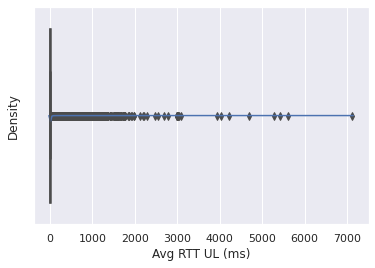

In [42]:
# Distribution plot to check for skewness

sns.boxplot(df['Avg RTT UL (ms)'])

sns.distplot(df['Avg RTT UL (ms)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


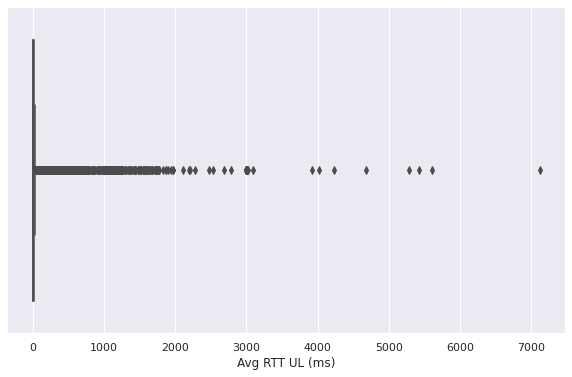

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df['Avg RTT UL (ms)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


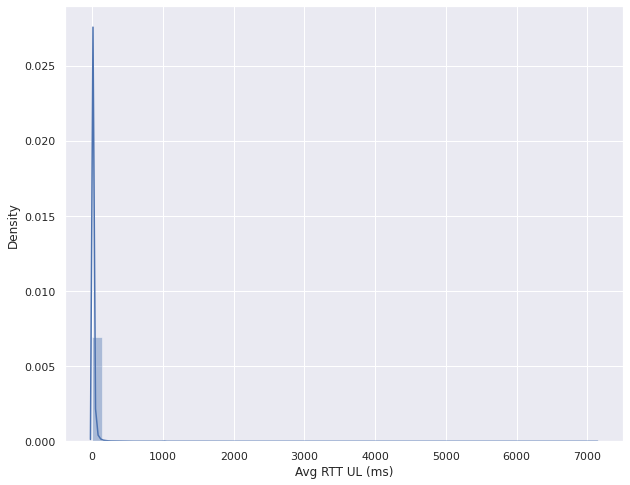

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df['Avg RTT UL (ms)'])

In [45]:
#df_clean['# fill missing with ffill method for columns ()

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')

# fill 'Handset Type, Handset Manufacturer, IMEI & MSISDN/Number' column with mode 
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].mode()[0])
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].mode()[0])

In [46]:
percent_missing(df_clean)
every_column_percent_missing(df_clean)

The Week1 challenge data source(CSV).csv dataset contains 0.82 % missing values.
                                                   column_name  percent_missing
Bearer Id                                            Bearer Id             0.00
Dur. (ms).1                                        Dur. (ms).1             0.00
Handset Manufacturer                      Handset Manufacturer             0.00
Handset Type                                      Handset Type             0.00
Nb of sec with Vol DL < 6250B    Nb of sec with Vol DL < 6250B             0.00
Nb of sec with Vol UL < 1250B    Nb of sec with Vol UL < 1250B             0.00
Social Media DL (Bytes)                Social Media DL (Bytes)             0.00
Social Media UL (Bytes)                Social Media UL (Bytes)             0.00
Google DL (Bytes)                            Google DL (Bytes)             0.00
Google UL (Bytes)                            Google UL (Bytes)             0.00
Email DL (Bytes)                       

In [50]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [48]:
#top 10 customers per engagement metric 


In [49]:
# The top 10 handsets used by the customers

top10_handsets_customers = df_clean[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

Handset Type  Total
316               Huawei B528S-23A  11170
53         Apple iPhone 6S (A1688)   6765
1395                     undefined   6716
49          Apple iPhone 6 (A1586)   6271
59          Apple iPhone 7 (A1778)   4721
73         Apple iPhone Se (A1723)   3764
66          Apple iPhone 8 (A1905)   3550
955   Samsung Galaxy S8 (Sm-G950F)   3275
78         Apple iPhone Xr (A2105)   3077
888    Samsung Galaxy J5 (Sm-J530)   2760

In [23]:
# top 3 handset manufacturers
top3_handset_manufacturers = df_clean[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

Handset Manufacturer   IMSI
0                Apple  42684
1              Samsung  30980
2               Huawei  21742

In [24]:
# top 5 handset manfacturer for Apple
Apple_handsets = df_clean[df_clean['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

Handset Type  IMSI
0  Apple iPhone 6S (A1688)  6765
1   Apple iPhone 6 (A1586)  6271
2   Apple iPhone 7 (A1778)  4721
3  Apple iPhone Se (A1723)  3764
4   Apple iPhone 8 (A1905)  3550

In [25]:
#top 5 handset manfacturer for Huawei
Huawei_handsets = df_clean[df_clean['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

Handset Type   IMSI
0                Huawei B528S-23A  10638
1  Huawei P20 Lite Huawei Nova 3E   1534
2                    Huawei E5180   1185
3                      Huawei P20   1110
4                  Huawei Y6 2018    757

In [26]:
#top 5 handset manfacturer for Samsung
Samsung_handset = df_clean[df_clean['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

Handset Type  IMSI
0  Samsung Galaxy S8 (Sm-G950F)  3275
1   Samsung Galaxy J5 (Sm-J530)  2760
2    Samsung Galaxy A5 Sm-A520F  2721
3   Samsung Galaxy J3 (Sm-J330)  2606
4  Samsung Galaxy S7 (Sm-G930X)  2310

In [27]:
#number_of_xDR_sessions = df_clean.groupby(['MSISDN/Number', 'Bearer Id']).groups
number_of_xDR_sessions = df_clean.groupby(['IMSI'])['Bearer Id'].count()
number_of_xDR_sessions.head(5)

IMSI
204,047,108,489,451.00    1
204,080,810,288,647.00    1
208,200,101,016,140.00    1
208,200,101,127,285.00    1
208,200,101,148,045.00    2
Name: Bearer Id, dtype: int64

In [28]:
number_of_xDR_sessions.describe()

count   107,265.00
mean          1.39
std           0.81
min           0.00
25%           1.00
50%           1.00
75%           2.00
max          27.00
Name: Bearer Id, dtype: float64

In [51]:
#Session duration
session_duration = df_clean.groupby(['IMSI'])['Dur. (ms)'].sum()
session_duration.head(5)

IMSI
204,047,108,489,451.00   869,844.00
204,080,810,288,647.00   877,385.00
208,200,101,016,140.00    86,019.00
208,200,101,127,285.00    86,254.00
208,200,101,148,045.00   573,923.00
Name: Dur. (ms), dtype: float64

In [52]:
session_duration.describe()

count      107,265.00
mean       146,286.13
std        186,667.79
min          7,142.00
25%         70,847.00
50%        102,662.00
75%        172,799.00
max     18,553,754.00
Name: Dur. (ms), dtype: float64

In [53]:
# the total download (DL) and upload (UL) df_clean
total_DL_UL = df_clean.groupby(['IMSI'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Total UL (Bytes)  Total DL (Bytes)
IMSI                                                      
204,047,108,489,451.00     60,456,049.00     78,697,597.00
204,080,810,288,647.00     37,295,915.00    194,828,056.00
208,200,101,016,140.00     53,794,658.00     31,376,981.00
208,200,101,127,285.00     33,583,272.00    392,918,313.00
208,200,101,148,045.00     71,325,004.00    961,767,023.00

In [54]:
total_DL_UL.describe()

Total UL (Bytes)  Total DL (Bytes)
count        107,265.00        107,265.00
mean      57,504,410.29    635,779,484.53
std       35,840,225.24    466,405,260.96
min        2,866,892.00      8,827,082.00
25%       36,436,232.00    315,820,067.00
50%       46,870,094.00    571,615,755.00
75%       66,195,129.00    809,006,197.00
max      729,577,380.00  8,156,743,493.00

In [55]:
# the total data volume (in Bytes) during this session for each application
total_data_volume = df_clean[['IMSI', 'Dur. (ms)' ,'Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)',
                        'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                        'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                        'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                        'Other DL (Bytes)', 'Other UL (Bytes)' ]].groupby(['IMSI']).sum()
total_data_volume.head(5)

Dur. (ms)  ...  Other UL (Bytes)
IMSI                               ...                  
204,047,108,489,451.00 869,844.00  ...     12,200,737.00
204,080,810,288,647.00 877,385.00  ...      2,848,373.00
208,200,101,016,140.00  86,019.00  ...     15,929,178.00
208,200,101,127,285.00  86,254.00  ...      8,707,888.00
208,200,101,148,045.00 573,923.00  ...     23,566,580.00

[5 rows x 17 columns]

In [57]:
df_clean = total_data_volume

In [59]:
percent_missing(df_clean)

The Week1 challenge data source(CSV).csv dataset contains 0.0 % missing values.


In [60]:
df_clean.fillna(df_clean.mean(), inplace = True) #  fill nann column with mode

In [62]:
df_clean.head()

Dur. (ms)  ...  Other UL (Bytes)
IMSI                               ...                  
204,047,108,489,451.00 869,844.00  ...     12,200,737.00
204,080,810,288,647.00 877,385.00  ...      2,848,373.00
208,200,101,016,140.00  86,019.00  ...     15,929,178.00
208,200,101,127,285.00  86,254.00  ...      8,707,888.00
208,200,101,148,045.00 573,923.00  ...     23,566,580.00

[5 rows x 17 columns]

In [63]:
df_clean.isna().sum()

Dur. (ms)                  0
Total UL (Bytes)           0
Total DL (Bytes)           0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
dtype: int64

In [65]:
# fix outliers
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, bytes_data):
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column_list):
    for column in column_list:
        df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].mean(),df[column])
    
    return df

pd.options.display.float_format = format_float

In [66]:
df_clean = fix_outlier(df_clean, list(df_clean.columns))

In [67]:
df_clean.describe()

Dur. (ms)  Total UL (Bytes)  ...  Other DL (Bytes)  Other UL (Bytes)
count 107,265.00        107,265.00  ...        107,265.00        107,265.00
mean  121,853.29     51,830,565.85  ...    523,866,551.15     10,281,142.76
std    77,187.18     22,208,140.07  ...    310,734,929.34      6,073,616.91
min     7,142.00      2,866,892.00  ...          3,290.00            156.00
25%    70,847.00     36,436,232.00  ...    277,552,731.00      5,480,381.00
50%   102,662.00     46,870,094.00  ...    531,194,164.00     10,404,923.00
75%   163,727.00     59,200,054.00  ...    720,373,070.00     14,158,825.00
max   370,424.00    125,215,946.00  ...  1,419,554,830.00     27,770,050.00

[8 rows x 17 columns]

In [68]:
len(list(df_clean.columns))

17

In [69]:
#Plotting functions
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(df_clean=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(df_clean=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(df_clean = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(df_clean = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(df_clean = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(df_clean = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

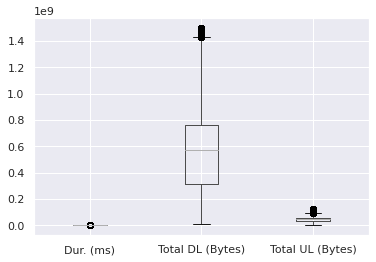

In [71]:
df_clean.boxplot(column=['Dur. (ms)', "Total DL (Bytes)","Total UL (Bytes)"])

Text(0.5, 1.0, 'Duration Histogram')

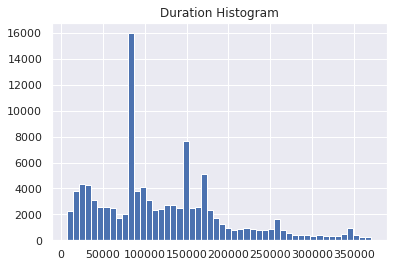

In [72]:
df_clean["Dur. (ms)"].hist(bins = 50)
plt.title("Duration Histogram")

Text(0.5, 1.0, 'Total Upload Histogram')

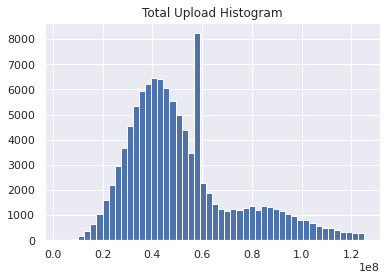

In [73]:
df_clean["Total UL (Bytes)"].hist(bins = 50)
plt.title("Total Upload Histogram")

Text(0.5, 1.0, 'Total Download Histogram')

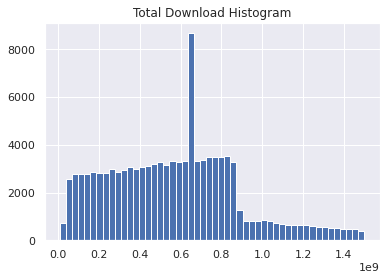

In [74]:
df_clean["Total DL (Bytes)"].hist(bins = 50)
plt.title("Total Download Histogram")

In [75]:
#Multivariate analysis
def total_data_per_app(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    return df
df_clean = total_data_per_app(df_clean)

In [76]:
appdata = df_clean[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
appdata.head(5)

Social Media  ...            Other
IMSI                                  ...                 
204,047,108,489,451.00  1,546,088.00  ...   401,360,457.00
204,080,810,288,647.00    715,224.00  ...   470,526,473.00
208,200,101,016,140.00  3,122,781.00  ...   515,973,704.00
208,200,101,127,285.00  2,577,104.00  ...   309,610,741.00
208,200,101,148,045.00  3,426,716.00  ... 1,079,435,419.00

[5 rows x 7 columns]

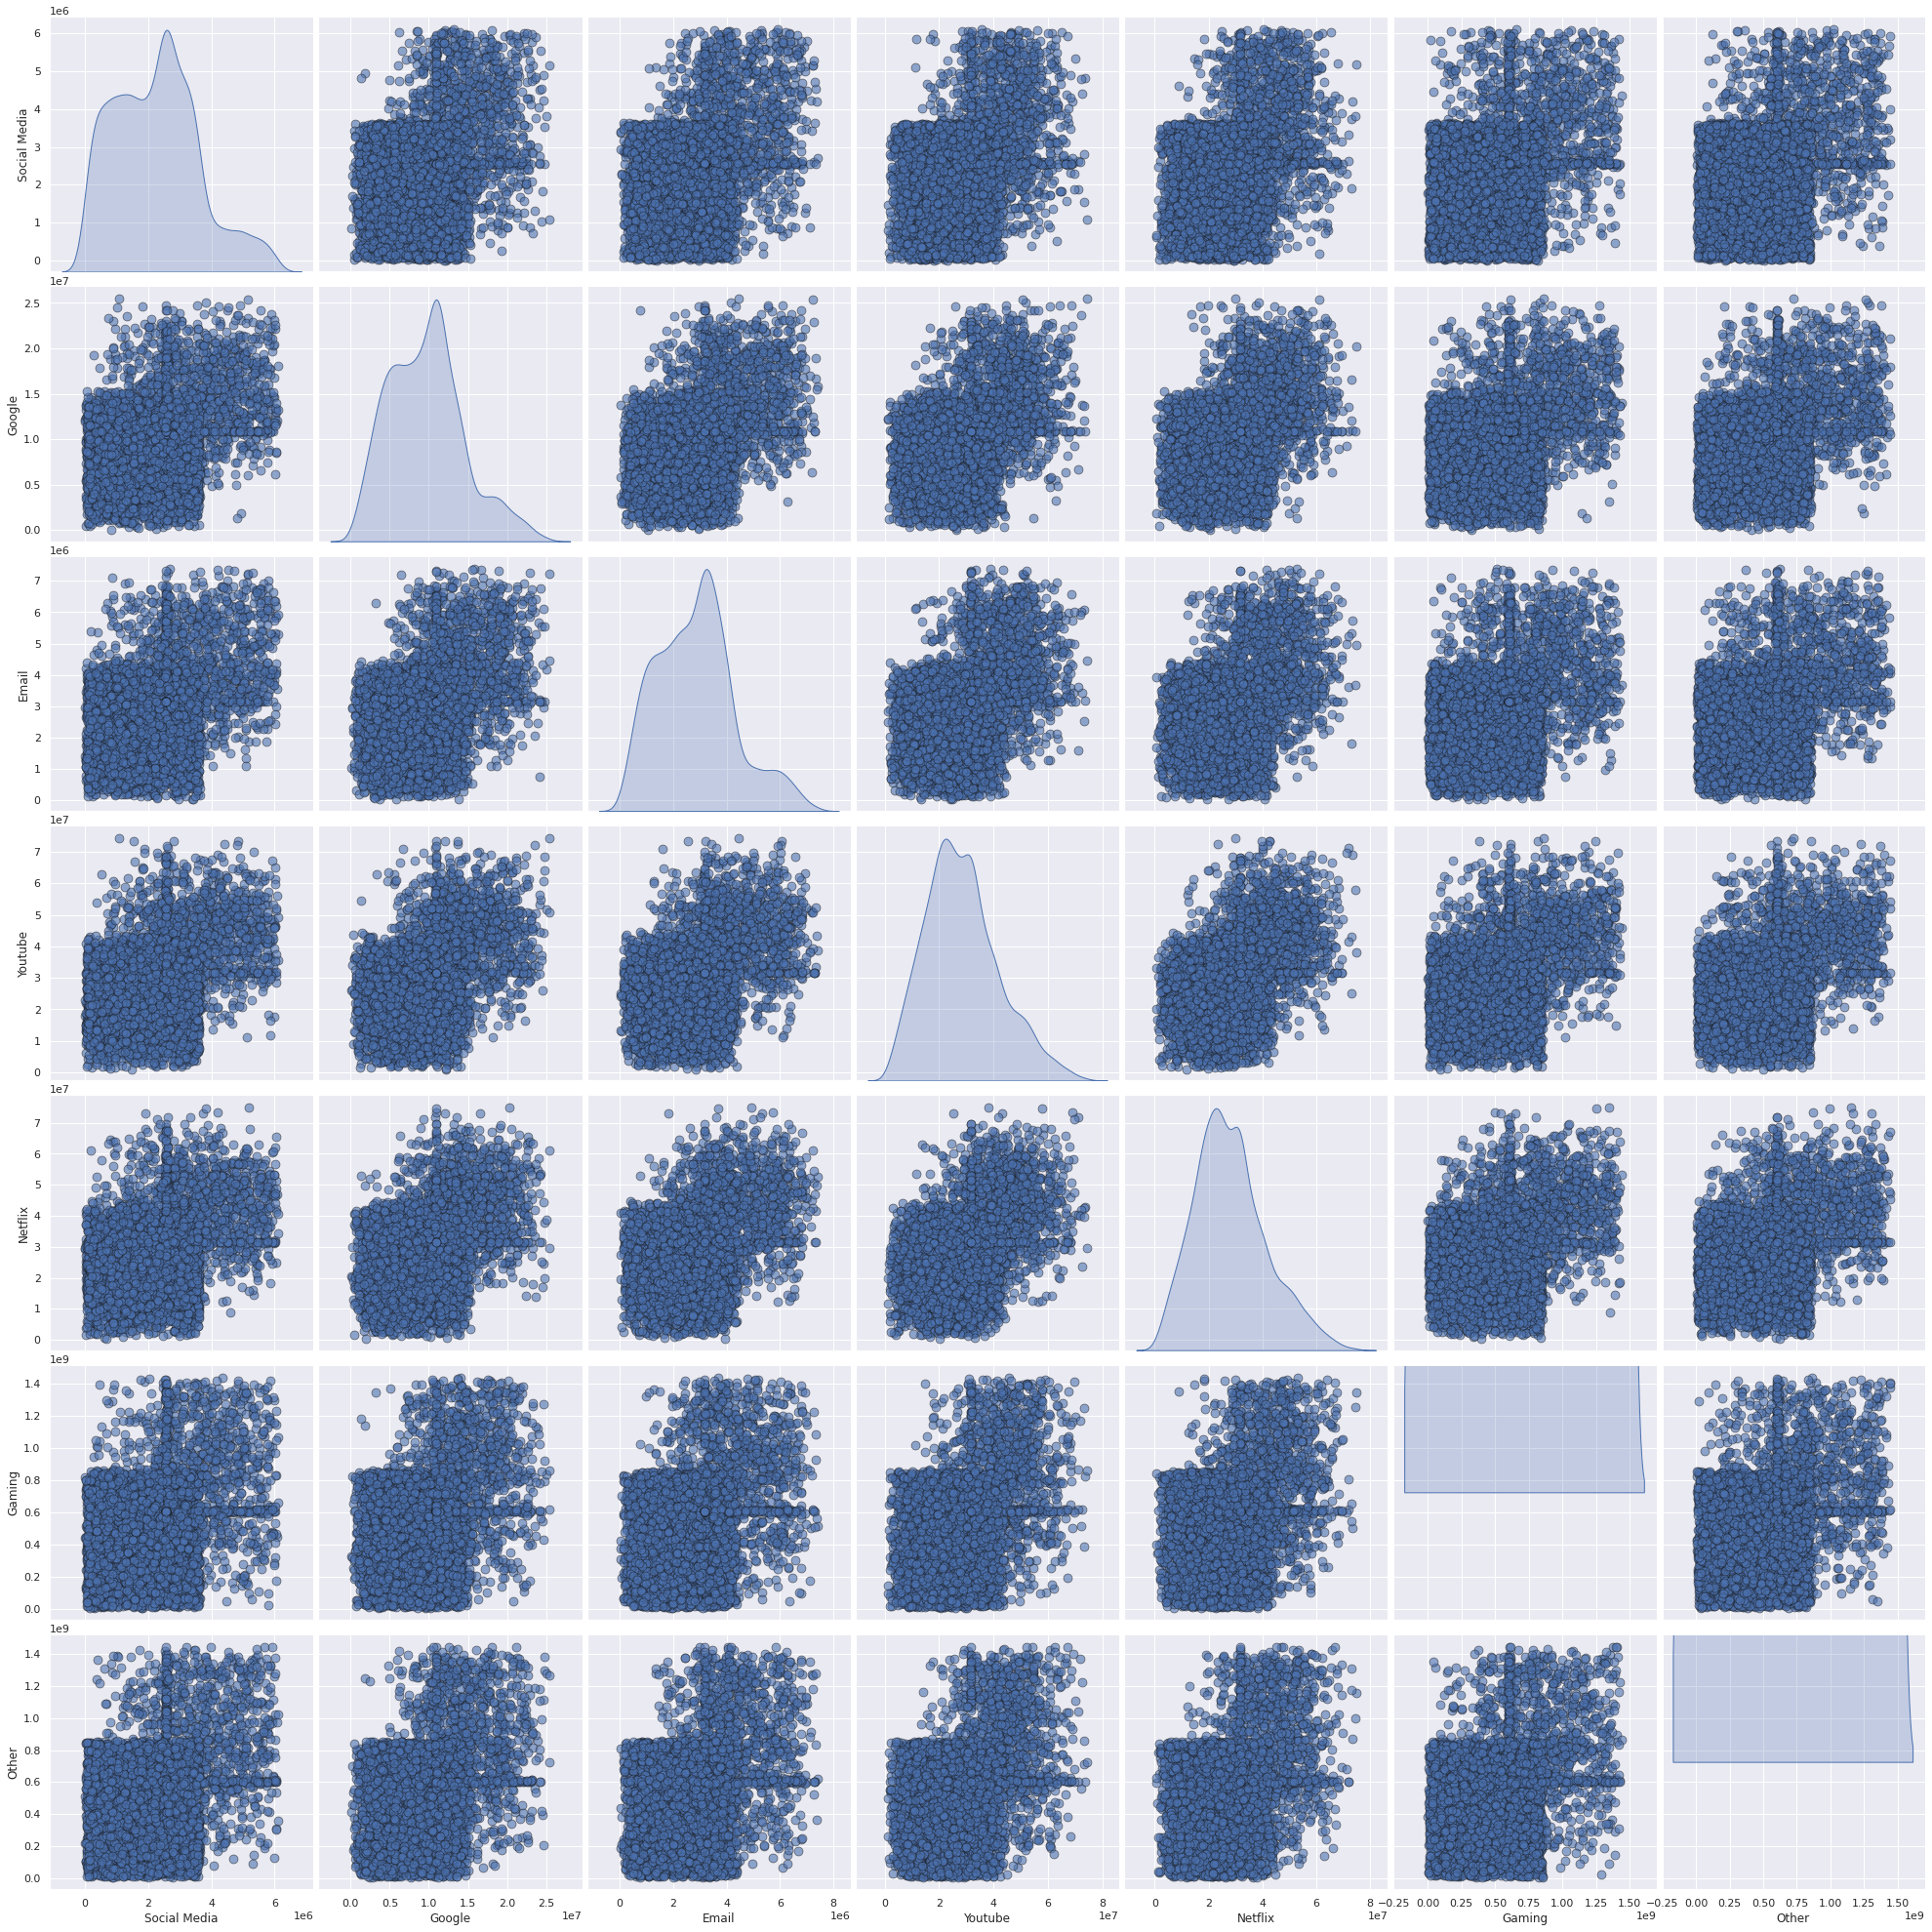

In [77]:
sns.pairplot(appdata.sample(5000), diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height=4)

In [78]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 107265 entries, 204047108489451.0 to 214074303349628.0
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Social Media  107265 non-null  float64
 1   Google        107265 non-null  float64
 2   Email         107265 non-null  float64
 3   Youtube       107265 non-null  float64
 4   Netflix       107265 non-null  float64
 5   Gaming        107265 non-null  float64
 6   Other         107265 non-null  float64
dtypes: float64(7)
memory usage: 6.5 MB


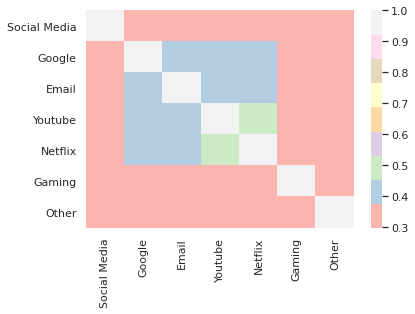

In [79]:
dataset=df_clean[['Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']]
corr = dataset.corr()
sns.heatmap(corr, cmap='Pastel1')